In [ ]:
#📦 Step 1: Load Cleaned Data
#📁 Load the cleaned data from the CSV files for Benin, Sierra Leone, and Togo
#   
#   📁 The cleaned data is in the Data folder
#   
#   📁 The cleaned data has the following columns:
#
#   - Timestamp: The date and time of the observation
#   - Country: The country of the observation
#   - Confirmed: The number of confirmed cases
import pandas as pd

benin = pd.read_csv("../Data/benin_cleaned.csv", parse_dates=["Timestamp"])
sierra = pd.read_csv("../Data/sierraleone_cleaned.csv", parse_dates=["Timestamp"])
togo = pd.read_csv("../Data/togo_cleaned.csv", parse_dates=["Timestamp"])

benin["Country"] = "Benin"
sierra["Country"] = "Sierra Leone"
togo["Country"] = "Togo"

df_all = pd.concat([benin, sierra, togo], ignore_index=True)


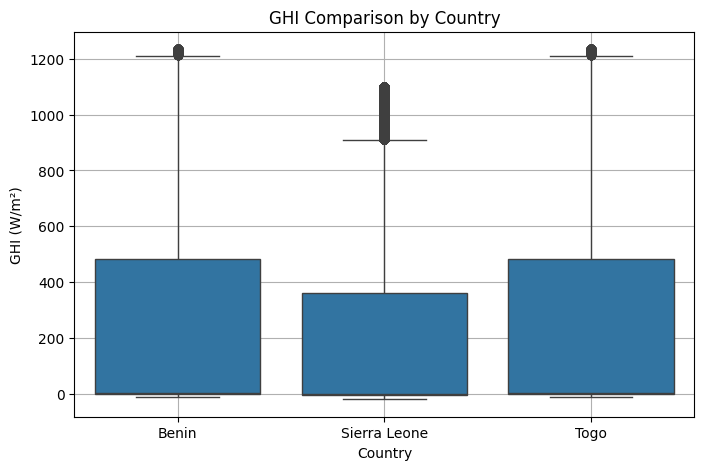

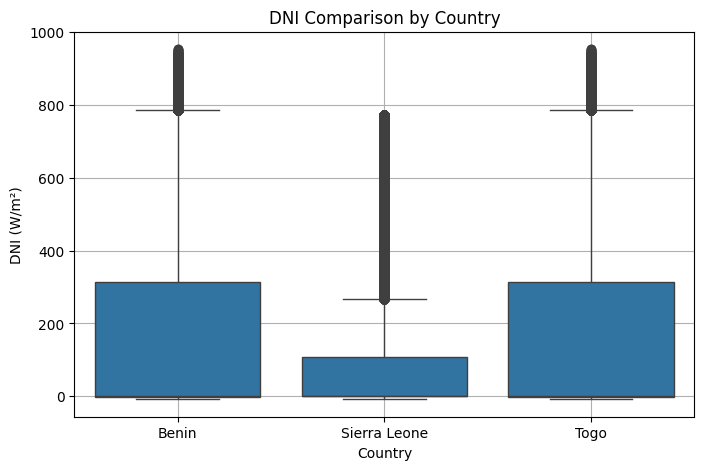

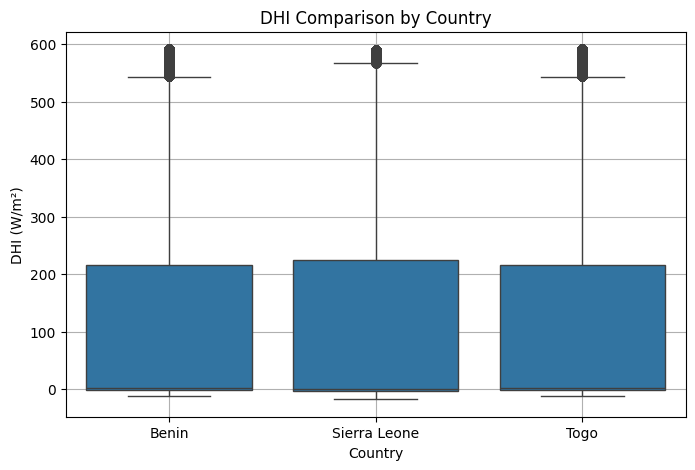

In [35]:
#📊 Step 2: Metric Comparison - Boxplots
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ["GHI", "DNI", "DHI"]
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_all, x="Country", y=metric)
    plt.title(f"{metric} Comparison by Country")
    plt.ylabel(f"{metric} (W/m²)")
    plt.grid(True)
    plt.show()


In [36]:
#📋 Step 3: Summary Table (Mean, Median, SD)

summary_table = df_all.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"])
summary_table.columns = ['_'.join(col) for col in summary_table.columns]
summary_table.reset_index(inplace=True)
summary_table


,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,240.551452,1.8,331.106225,167.187516,-0.1,261.710501,115.101794,1.6,157.870700
1,Sierra Leone,201.612506,0.3,297.381491,115.675784,-0.1,216.415753,113.465147,-0.1,158.112828
2,Togo,240.551452,1.8,331.106225,167.187516,-0.1,261.710501,115.101794,1.6,157.870700


In [37]:
#📐 Step 4: Statistical Testing (ANOVA or Kruskal–Wallis)

from scipy.stats import f_oneway

f_stat, p_val = f_oneway(benin["GHI"], sierra["GHI"], togo["GHI"])
print(f"ANOVA result on GHI: F = {f_stat:.3f}, p = {p_val:.5f}")


ANOVA result on GHI: F = 2589.992, p = 0.00000


In [41]:
#Option 2: Kruskal–Wallis (if data is not normally distributed)
from scipy.stats import kruskal

h_stat, p_val = kruskal(benin["GHI"], sierra["GHI"], togo["GHI"])
print(f"Kruskal–Wallis result on GHI: H = {h_stat:.3f}, p = {p_val:.5f}")


Kruskal–Wallis result on GHI: H = 4172.312, p = 0.00000


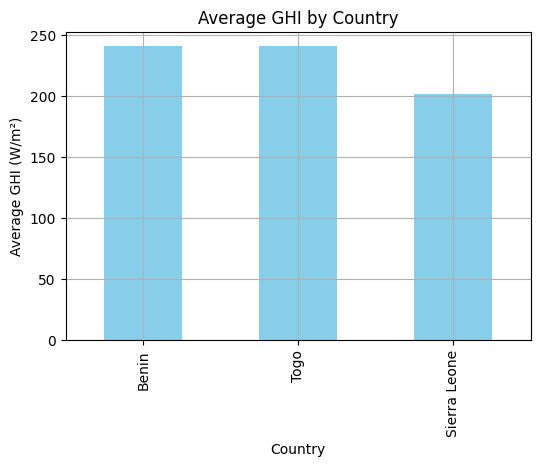

In [47]:
#🏆 (Bonus) Step 5: Visual Summary - Bar Chart Ranking
ghi_avg = df_all.groupby("Country")["GHI"].mean().sort_values(ascending=False)

ghi_avg.plot(kind='bar', color='skyblue', figsize=(6, 4))
plt.title("Average GHI by Country")
plt.ylabel("Average GHI (W/m²)")
plt.grid(True)
plt.show()
